# Final Project
 Yuhan Xu 474154, Wenda Yin 467295, Christy Ren 474884, Rita Shi 474882 

In [12]:
#Session Prep
import json
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#text normalization function
%run ./Text_Normalization_Function.ipynb


You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
Processing /Users/renmengyuan/Library/Caches/pip/wheels/11/86/38/0554afea46105c70bae8d223c427bba371aa0c83ce88d57b27/html_parser-0.2-py3-none-any.whl
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [28]:
df = pd.read_json("All_Beauty.json",
                        lines=True,
                        orient='columns')
df.head(10)

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,0143026860,NaN,1,great,"02 19, 2015",A1V6B6TNIC10QE,theodore j bigham,NaN,One Star,1424304000,True,NaN
1,0143026860,NaN,4,My husband wanted to reading about the Negro ...,"12 18, 2014",A2F5GHSXFQ0W6J,Mary K. Byke,NaN,... to reading about the Negro Baseball and th...,1418860800,True,NaN
2,0143026860,NaN,4,"This book was very informative, covering all a...","08 10, 2014",A1572GUYS7DGSR,David G,NaN,Worth the Read,1407628800,True,NaN
3,0143026860,NaN,5,I am already a baseball fan and knew a bit abo...,"03 11, 2013",A1PSGLFK1NSVO,TamB,NaN,Good Read,1362960000,True,NaN
4,0143026860,NaN,5,This was a good story of the Black leagues. I ...,"12 25, 2011",A6IKXKZMTKGSC,shoecanary,NaN,"More than facts, a good story read!",1324771200,True,5
5,0143026860,NaN,5,Today I gave a book about the Negro Leagues of...,"02 26, 2010",A36NF437WZLQ9E,W. Powell,NaN,The Gift of Black Baseball,1267142400,False,4
6,0143026860,NaN,4,The story of race relations in American histor...,"03 7, 2001",A10Q8NIFOVOHFV,Robert S. Clay Jr.,NaN,"Baseball, America, and racism.",983923200,False,14
7,014789302X,NaN,1,I didn't like this product it smudged all unde...,"04 10, 2017",A26PO1B2Q2G1CS,Jacqueline Diaz,NaN,One Star,1491782400,True,NaN
8,014789302X,NaN,5,I simply love the product. I appreciate print ...,"01 3, 2017",AQ812VYVTC2RJ,Khadijah Ali-Evans,NaN,Five Stars,1483401600,True,NaN
9,014789302X,NaN,1,it burns your eyes when u put it on and very ...,"11 19, 2016",AMACNEW14ADMX,rabiyaa123,NaN,i do not recommend.,1479513600,True,3


In [29]:
df['reviewText']=df['reviewText'].astype(str)

In [30]:
reviews = np.array(df['reviewText'])
normalized_reviews = normalize_corpus(reviews) 

# Explore the Data

## Creating a Wordcloud

### For reviewText

In [2]:
from wordcloud import WordCloud

In [3]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [4]:
from nltk.corpus import stopwords
# nltk.download()

In [5]:
# Stopword Removal
stop = stopwords.words('english')

In [6]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [7]:
frequency_words_wo_stop = {}

In [8]:
def generate_word_frequency(row):
    data = row['reviewText']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token.lower()]
                count = count + 1
                frequency_words_wo_stop[token.lower()] = count
            else:
                frequency_words_wo_stop[token.lower()] = 1
    
    return ','.join(token_list)

In [9]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It seems that people buying beauty products cares more about hair products, smell&scent and normally leave a positive review. 

### For Summary

In [14]:
df['summary'] = df['summary'].astype(str) 

In [15]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [16]:
frequency_words_wo_stop_1 = {}

In [17]:
def generate_word_frequency_1(row):
    data = row['summary']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words_wo_stop_1:
                count = frequency_words_wo_stop_1[token.lower()]
                count = count + 1
                frequency_words_wo_stop_1[token.lower()] = count
            else:
                frequency_words_wo_stop_1[token.lower()] = 1
    
    return ','.join(token_list)

In [18]:
df['tokens_1'] = df.apply(generate_word_frequency_1,axis=1)

In [19]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop_1)

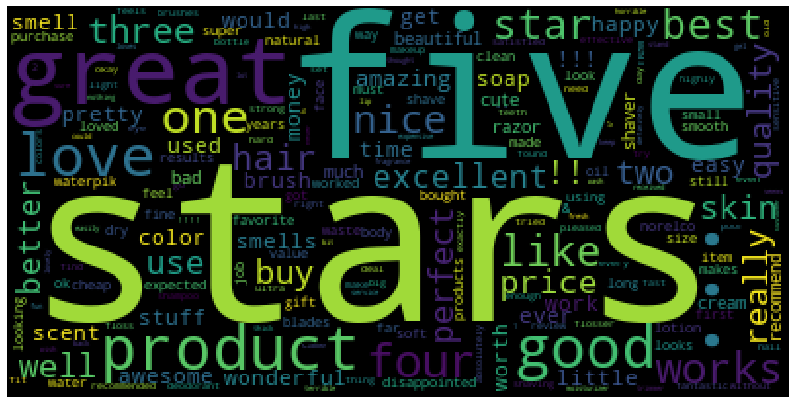

In [20]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It seems that people normally make comments such as "five star" when they feel good about the product and the reviews are mostly postive. In the summary part, people mention words such as "shampoo", "body","wash","soap", etc, but also "smell" and "scent".

## Questions:
1. What is the sentiment distribution of the “All Beauty” category reviews and overtime trend? 

2. What are the most frequent topics when it comes to complaints? 

3. What are the most popular topics when it comes to positive feedback? 

4. What are the differences in the sentiment between those who frequently leave a review and those who seldom leave reviews?   

5. Does the proportion of the positive reviews grow through time or not? 

6. Does posting an image more likely lead to a positive comment or not? 

### 1. What is the sentiment distribution of the “All Beauty” category reviews and overtime trend？

In [10]:
df = pd.read_json("All_Beauty.json",
                        lines=True,
                        orient='columns')
df['logic']= np.where(df["overall"]>3,"postive","negative")

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,logic
0,0143026860,NaN,1,great,"02 19, 2015",A1V6B6TNIC10QE,theodore j bigham,NaN,One Star,1424304000,True,NaN,negative
1,0143026860,NaN,4,My husband wanted to reading about the Negro ...,"12 18, 2014",A2F5GHSXFQ0W6J,Mary K. Byke,NaN,... to reading about the Negro Baseball and th...,1418860800,True,NaN,postive
2,0143026860,NaN,4,"This book was very informative, covering all a...","08 10, 2014",A1572GUYS7DGSR,David G,NaN,Worth the Read,1407628800,True,NaN,postive
3,0143026860,NaN,5,I am already a baseball fan and knew a bit abo...,"03 11, 2013",A1PSGLFK1NSVO,TamB,NaN,Good Read,1362960000,True,NaN,postive
4,0143026860,NaN,5,This was a good story of the Black leagues. I ...,"12 25, 2011",A6IKXKZMTKGSC,shoecanary,NaN,"More than facts, a good story read!",1324771200,True,5,postive


In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
df['reviewText']=df['reviewText'].astype(str)

In [76]:
df_reviews = np.array(df['reviewText'])

In [56]:
pip install Cython

You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [77]:
normalized_train_reviews = normalize_corpus(df['reviewText'])

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [79]:
def analyze_sentiment_vader_lexicon(review, threshold = 0, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [80]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.8) for review in df_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity,columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df.head()

,VADER Polarity,VADER Score
0,negative,0.6249
1,negative,0.7073
2,negative,0.0000
3,negative,0.1655
4,positive,0.9593


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bbc3f28>]],
      dtype=object)

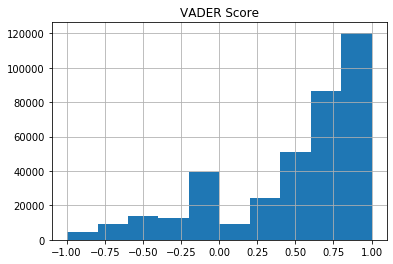

In [81]:
VADER_polarity_df.hist(column = "VADER Score")

### 2. What are the most frequent topics when it comes to complaints? 

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [33]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.8, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [34]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.5) for review in normalized_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])
df["VADER Polarity"] = VADER_polarity_df["VADER Polarity"]

In [35]:
df_negative = df[df["VADER Polarity"] == "negative"]
negative_reviews = np.array(df_negative['reviewText'])

In [36]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [37]:
#normalize the data
normalized_negative = normalize_corpus(negative_reviews)

#define a Bag-of-Words vecgtorizer
bow_vectorizer = CountVectorizer(max_features=1000)

#vectorize the data
bow_negative_corpus = bow_vectorizer.fit_transform(normalized_negative)

In [38]:
#topic modeling using LDA
lda_negative = LatentDirichletAllocation(n_components=4, max_iter=500,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_negative_corpus)

In [39]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_negative, bow_negative_corpus, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      419.468597 -569.215149       1        1  30.021733
1     -329.109741  -69.220474       2        1  29.944610
2     -204.936111 -693.682251       3        1  25.702456
0      295.294250   55.247250       4        1  14.331201, topic_info=    Category          Freq     Term         Total  loglift  logprob
370  Default  17285.000000     good  17285.000000  30.0000  30.0000
382  Default  14023.000000     hair  14023.000000  29.0000  29.0000
987  Default  22665.000000     work  22665.000000  28.0000  28.0000
946  Default  35231.000000      use  35231.000000  27.0000  27.0000
971  Default   9820.000000     well   9820.000000  26.0000  26.0000
156  Default   6202.000000    color   6202.000000  25.0000  25.0000
798  Default   9779.000000     skin   9779.000000  24.0000  24.0000
563  Default   5763.000000     nice   5763.000000  23.0000  23.0000
288  Default   5188.000000   expect   5188.000000  22.0000  22.0000
107  Default   4885.000000    brush   4885.000000  21.0000  21.0000
806  Default   6459.000000    smell   6459.000000  20.0000  20.0000
805  Default   5481.000000    small   5481.000000  19.0000  19.0000
775  Default   5402.000000    shave   5402.000000  18.0000  18.0000
661  Default   5312.000000    price   5312.000000  17.0000  17.0000
697  Default   9226.000000   really   9226.000000  16.0000  16.0000
539  Default   4657.000000    money   4657.000000  15.0000  15.0000
667  Default  25922.000000  product  25922.000000  14.0000  14.0000
691  Default   4335.000000    razor   4335.000000  13.0000  13.0000
995  Default   6941.000000     year   6941.000000  12.0000  12.0000
134  Default   3862.000000    cheap   3862.000000  11.0000  11.0000
298  Default   4243.000000     face   4243.000000  10.0000  10.0000
491  Default   8629.000000     look   8629.000000   9.0000   9.0000
700  Default   3696.000000  receive   3696.000000   8.0000   8.0000
595  Default   5238.000000    order   5238.000000   7.0000   7.0000
961  Default   4124.000000    water   4124.000000   6.0000   6.0000
443  Default   3379.000000     item   3379.000000   5.0000   5.0000
959  Default   3345.000000    waste   3345.000000   4.0000   4.0000
200  Default   3337.000000      cut   3337.000000   3.0000   3.0000
585  Default   2280.000000       ok   2280.000000   2.0000   2.0000
82   Default   3254.000000    blade   3254.000000   1.0000   1.0000
..       ...           ...      ...           ...      ...      ...
436   Topic4    492.469704     iron    493.237585   1.9412  -5.8021
877   Topic4    413.112324   tangle    413.876751   1.9409  -5.9778
771   Topic4    410.092748    shade    410.862985   1.9409  -5.9851
198   Topic4    394.020882    curly    394.789963   1.9408  -6.0251
780   Topic4    397.027241    shiny    397.803547   1.9408  -6.0175
451   Topic4    387.977605    kinda    388.762414   1.9407  -6.0406
829   Topic4    357.838352   sponge    358.625373   1.9405  -6.1214
250   Topic4    345.795163    dryer    346.570706   1.9405  -6.1557
778   Topic4    336.762681     shed    337.529577   1.9405  -6.1822
971   Topic4   6313.114542     well   9820.177858   1.5009  -3.2511
893   Topic4   1190.554792     thin   1456.420942   1.7412  -4.9194
987   Topic4  12550.494036     work  22665.091058   1.3517  -2.5640
891   Topic4   1236.068691    thick   1647.877555   1.6552  -4.8818
323   Topic4   1637.659733     fine   2398.666912   1.5611  -4.6005
697   Topic4   3796.235465   really   9226.001226   1.0547  -3.7598
309   Topic4   1188.741516     fast   1828.604216   1.5121  -4.9209
446   Topic4   1438.931565      job   2504.454901   1.3886  -4.7299
477   Topic4   1404.064820    light   2512.866414   1.3607  -4.7544
667   Topic4   5773.706838  product  25922.539987   0.4409  -3.3405
491   Topic4   2847.640119     look   8629.914456   0.8340  -4.0473
478   Topic4   3838.471608     like  14672.801853   0.6018  -3.7487
486  

### 3. What are the most popular topics when it comes to positive feedback? 

In [40]:
df_positive = df[df["VADER Polarity"] == "positive"]
positive_reviews = np.array(df_positive['reviewText'])

In [41]:
#normalize the data
normalized_positive = normalize_corpus(positive_reviews)

#define a Bag-of-Words vecgtorizer
bow_vectorizer = CountVectorizer(max_features=1000)

#vectorize the data
bow_positive_corpus = bow_vectorizer.fit_transform(normalized_positive)

In [42]:
#topic modeling using LDA
lda_positive = LatentDirichletAllocation(n_components=4, max_iter=500,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_positive_corpus)

In [43]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_positive, bow_positive_corpus, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -339.715210 -234.732208       1        1  34.655926
1      -78.384987 -468.902740       2        1  25.406783
3      155.836624 -207.618484       3        1  22.516629
2     -105.493294   26.552197       4        1  17.420661, topic_info=    Category           Freq       Term          Total  loglift  logprob
496  Default   75643.000000       love   75643.000000  30.0000  30.0000
373  Default   79305.000000      great   79305.000000  29.0000  29.0000
382  Default   50098.000000       hair   50098.000000  28.0000  28.0000
806  Default   44025.000000       skin   44025.000000  27.0000  27.0000
159  Default   23760.000000      color   23760.000000  26.0000  26.0000
674  Default   90844.000000    product   90844.000000  25.0000  25.0000
813  Default   31348.000000      smell   31348.000000  24.0000  24.0000
781  Default   21717.000000      shave   21717.000000  23.0000  23.0000
941  Default  118489.000000        use  118489.000000  22.0000  22.0000
700  Default   18056.000000      razor   18056.000000  21.0000  21.0000
667  Default   23714.000000      price   23714.000000  20.0000  20.0000
108  Default   23205.000000      brush   23205.000000  19.0000  19.0000
621  Default   15321.000000    perfect   15321.000000  18.0000  18.0000
86   Default   11308.000000      blade   11308.000000  17.0000  17.0000
144  Default   20902.000000      clean   20902.000000  16.0000  16.0000
995  Default   21944.000000       year   21944.000000  15.0000  15.0000
758  Default   15290.000000      scent   15290.000000  14.0000  14.0000
884  Default   10687.000000      teeth   10687.000000  13.0000  13.0000
551  Default    8791.000000       nail    8791.000000  12.0000  12.0000
782  Default   10208.000000     shaver   10208.000000  11.0000  11.0000
817  Default   14223.000000       soap   14223.000000  10.0000  10.0000
960  Default   14804.000000      water   14804.000000   9.0000   9.0000
582  Default   13865.000000        oil   13865.000000   8.0000   8.0000
116  Default   35333.000000        buy   35333.000000   7.0000   7.0000
691  Default   13248.000000    quality   13248.000000   6.0000   6.0000
199  Default   11821.000000      cream   11821.000000   5.0000   5.0000
72   Default    6675.000000  beautiful    6675.000000   4.0000   4.0000
297  Default   18008.000000       face   18008.000000   3.0000   3.0000
479  Default    6666.000000        lip    6666.000000   2.0000   2.0000
490  Default   35006.000000       look   35006.000000   1.0000   1.0000
..       ...            ...        ...            ...      ...      ...
736   Topic4    1403.465949       ring    1476.974502   1.6965  -6.2481
618   Topic4     770.263318     pencil     817.110653   1.6885  -6.8481
621   Topic4   12626.043864    perfect   15321.395484   1.5540  -4.0513
496   Topic4   56202.106241       love   75643.020530   1.4504  -2.5581
373   Topic4   56864.900411      great   79305.897708   1.4149  -2.5464
667   Topic4   17944.423107      price   23714.892090   1.4687  -3.6998
889   Topic4    4241.672029      thank    4936.156600   1.5959  -5.1421
282   Topic4    6499.999119  excellent    8118.089692   1.5252  -4.7153
691   Topic4    9776.518843    quality   13248.949834   1.4436  -4.3071
59    Topic4    3192.968390        bag    3735.547445   1.5906  -5.4261
308   Topic4    5109.172115       fast    6440.420745   1.5160  -4.9560
215   Topic4    4153.634481   daughter    5179.638333   1.5268  -5.1631
55    Topic4    4794.528528    awesome    6151.911450   1.4982  -5.0196
890   Topic4    2864.804332     thanks    3403.157242   1.5753  -5.5346
594   Topic4    9081.648394      order   14037.274708   1.3121  -4.3808
674   Topic4   34337.053064    product   90844.833648   0.7746  -3.0508
116   Topic4   15237.356282        buy   35333.525457   0.9064  -3.8633
389   Topic4    6349.031052      happy   12150.294544   1.0985  -4.7388
684   Top

### 4. What are the differences in the sentiment between those who frequently leave a review and those who seldom leave reviews?   

In [44]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/renmengyuan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']

In [46]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.5) for review in normalized_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df["score"] = df['overall'].reset_index(drop=True)
VADER_polarity_df.head()

,VADER Polarity,VADER Score,score
0,positive,0.6249,1
1,positive,0.6597,4
2,negative,0.0000,4
3,negative,0.3182,5
4,positive,0.9552,5


In [47]:
df_plot = VADER_polarity_df.sort_values("score").reset_index(drop=True).reset_index()

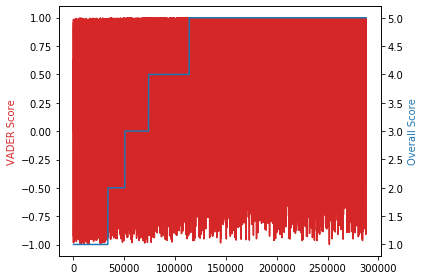

In [29]:
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_ylabel("VADER Score", color=color)
ax1.plot("index", "VADER Score", data=df_plot,color=color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Overall Score", color=color)
ax2.plot("index", "score", data=df_plot,color=color)

fig.tight_layout()
plt.show()

In [21]:
df["reviewerID"].value_counts().value_counts()
#About 77% people only left review once.-> Seldom

1     287784
2      30135
3       3702
4       1019
5        774
6        455
7         66
8         35
9         24
10        16
11        10
12         7
13         3
14         2
21         2
23         1
18         1
20         1
27         1
Name: reviewerID, dtype: int64

In [22]:
#split the data
v = df.reviewerID.value_counts()
df_freq = df[df.reviewerID.isin(v.index[v.gt(1)])]
df_seldom = df[df.reviewerID.isin(v.index[v.lt(2)])]

In [24]:
#the reviews of customers who frequently leave reviews
freq_reviews = np.array(df_freq['reviewText'])
normalized_freq_reviews = normalize_corpus(freq_reviews)

VADER_polarity_freq = [analyze_sentiment_vader_lexicon(review, threshold=0.5) for review in normalized_freq_reviews]
VADER_polarity_freq_df = pd.DataFrame(VADER_polarity_freq, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_freq_df.head()

,VADER Polarity,VADER Score,score
0,positive,0.3612,1.0
1,positive,0.9761,5.0
2,positive,0.5994,2.0
3,positive,0.9393,5.0
4,positive,0.8839,5.0


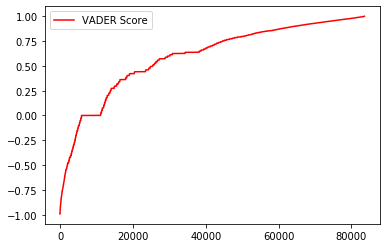

In [32]:
df_plot = VADER_polarity_freq_df.sort_values("VADER Score").reset_index(drop=True).reset_index()

plt.plot("index", "VADER Score", data=df_plot,color='red')
plt.legend()

In [33]:
VADER_polarity_freq_df["VADER Score"].mean()

0.5907290685846169

In [42]:
VADER_polarity_freq_df["VADER Polarity"].value_counts()

positive    58123
negative    25438
Name: VADER Polarity, dtype: int64

In [26]:
#the reviews of customers who seldom leave reviews
seld_reviews = np.array(df_seldom['reviewText'])
normalized_seld_reviews = normalize_corpus(seld_reviews)

VADER_polarity_seld = [analyze_sentiment_vader_lexicon(review, threshold=0.5) for review in normalized_seld_reviews]
VADER_polarity_seld_df = pd.DataFrame(VADER_polarity_seld, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_seld_df.head()

,VADER Polarity,VADER Score,score
0,positive,0.6249,1.0
1,positive,0.6597,4.0
2,negative,0.0000,4.0
3,positive,0.3182,5.0
4,positive,0.9552,5.0


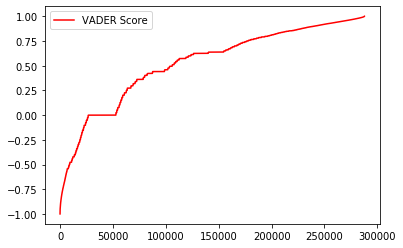

In [37]:
df_plot = VADER_polarity_seld_df.sort_values("VADER Score").reset_index(drop=True).reset_index()

plt.plot("index", "VADER Score", data=df_plot,color='red')
plt.legend()

In [38]:
VADER_polarity_seld_df["VADER Score"].mean()

0.5215111020765709

In [41]:
VADER_polarity_seld_df["VADER Polarity"].value_counts()

positive    181740
negative    106044
Name: VADER Polarity, dtype: int64

### 5. Does the proportion of the positive reviews growing through time or not? 

In [208]:
df['reviewTime']=pd.to_datetime(df['reviewTime']).dt.strftime("%Y-%m-%d")

In [210]:
df_merge = pd.merge(df, VADER_polarity_df, left_index=True, right_index=True)

In [212]:
df_sort = df_merge.sort_values(by=['reviewTime'])

In [213]:
df_sort['reviewTime_year'] = pd.to_datetime(df_sort['reviewTime']).dt.to_period('Y')

In [217]:
df_sort['VADER Polarity'][df_sort['VADER Polarity'] == 'positive'] = 1
df_sort['VADER Polarity'][df_sort['VADER Polarity'] == 'negative'] = 0

In [220]:
df_sort['VADER Polarity'] = pd.to_numeric(df_sort['VADER Polarity'])

In [221]:
df_sort_new = df_sort.groupby(['reviewTime_year']).agg({'VADER Polarity':['mean','size'],'VADER Score':'mean'})

In [224]:
#exclude 2018 because of insufficient records
df_sort_new_exclude = df_sort_new[df_sort_new.index<2018]

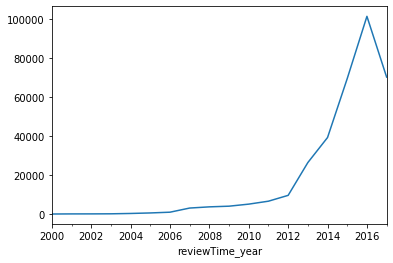

In [106]:
# Reviews numbers yearly change
df_sort_new_exclude['VADER Polarity']['count'].plot();

**The total number of reviews are growing year by year.**

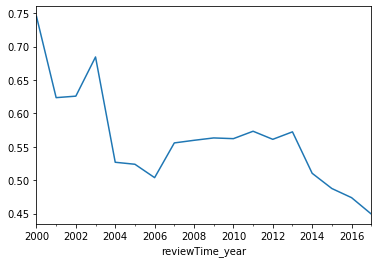

In [107]:
#import seaborn as sns

df_sort_new_exclude['VADER Score']['mean'].plot();

**The average VADER score is decreasing.**

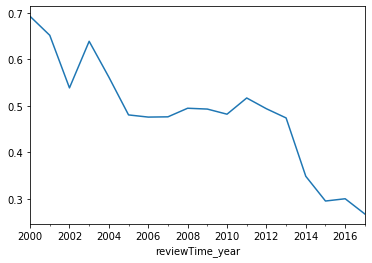

In [225]:
df_sort_new_exclude['VADER Polarity']['mean'].plot();

**The proportion of positive reviews among all reviews is also decreasing.**

### 6. Does posting an image more likely lead to a positive comment or not? 

In [230]:
df_sort[['image']] = df_sort[['image']].where(df_sort[['image']].isnull(), 1)\
                                       .fillna(0).astype(int)

 Now let's check the coefficient of correlation between different variables and review polarity. These values represent the Pearson correlation coefficient between different variables. 

In [235]:
import numpy as np
x = df_sort['image'].to_numpy()
y = df_sort['VADER Polarity'].to_numpy()
r = np.corrcoef(x, y)
r

array([[1.        , 0.06435181],
       [0.06435181, 1.        ]])

In [236]:
x = df_sort['overall'].to_numpy()
y = df_sort['VADER Polarity'].to_numpy()
r = np.corrcoef(x, y)
r

array([[1.        , 0.27840418],
       [0.27840418, 1.        ]])

We get a coefficient of  0.06435181, lower than 0.3, which shows no significant correlation between posting an image and probability of being a positive review. With additional correlation check between “overall” and “VADER Polarity”, we find a correlation of 0.27840418, which means a correlation between the overall rating and the sentimental polarity of an review.  

In [253]:
df_sort['verified'].value_counts()

True     322473
False     48872
Name: verified, dtype: int64

In [254]:
x = df_sort['verified'].to_numpy()
y = df_sort['VADER Polarity'].to_numpy()
r = np.corrcoef(x, y)
r

array([[ 1.        , -0.14454645],
       [-0.14454645,  1.        ]])

There is a minor negative correlation between "verified" and "VADER Polarity". This means that if a review is verified, it is more likely a negative review. 

### 7. What is the sentiment distribution in the "summary" column?

In [54]:
df['summary']=df['summary'].astype(str)

In [55]:
df_reviews = np.array(df['summary'])

In [56]:
pip install Cython

You should consider upgrading via the '/Users/renmengyuan/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [58]:
normalized_train_reviews = normalize_corpus(df['summary'])

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [70]:
def analyze_sentiment_vader_lexicon(review, threshold = 0, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [71]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.8) for review in df_reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity,columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df.head()

,VADER Polarity,VADER Score
0,negative,0.0000
1,negative,0.7073
2,negative,0.2263
3,negative,0.4404
4,negative,0.5355


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a73f43588>]],
      dtype=object)

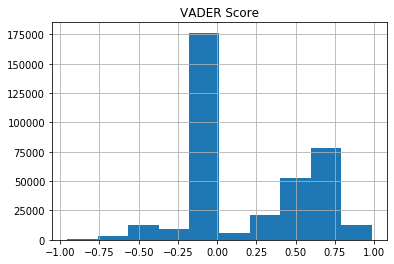

In [72]:
VADER_polarity_df.hist(column = "VADER Score")

In [73]:
df_comparison = pd.merge(df, VADER_polarity_df, left_index=True, right_index=True)